# Lab 1

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from collections import Counter

## Data Creation

Sample 20 vectors from each gaussian

$\mu_1 = \begin{bmatrix}2 \\ 2\end{bmatrix}$  $\sum_1 = \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$    
$\mu_2 = \begin{bmatrix}4 \\ 4\end{bmatrix}$  $\sum_2 = \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$  
$\mu_3 = \begin{bmatrix}3 \\ 4\end{bmatrix}$  $\sum_3 = \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix}$  
$\mu_4 = \begin{bmatrix}2 \\ 3\end{bmatrix}$  $\sum_4 = \begin{bmatrix} 1 & 0 \\ 0 & 2 \end{bmatrix}$  
$\mu_5 = \begin{bmatrix}3 \\ 3\end{bmatrix}$  $\sum_5 = \begin{bmatrix} 3 & 0 \\ 0 & 3 \end{bmatrix}$  

In [2]:
# Means matrix
means = []
means.append(np.array([2, 3]))
means.append(np.array([4, 4]))
means.append(np.array([3, 4]))
means.append(np.array([2, 3]))
means.append(np.array([3, 3]))

# Variance Matrix
covariance = []
covariance.append(np.array([[2, 0], [0, 2]]))
covariance.append(np.array([[2, 0], [0, 2]]))
covariance.append(np.array([[2, 0], [0, 1]]))
covariance.append(np.array([[1, 0], [0, 2]]))
covariance.append(np.array([[3, 0], [0, 3]]))

Store vectors as a matrix [ each column = 1 vector] => $X_{train}$
Store labels [(1, 2, 3, 4, 5)] as another vector => $Y_{train}$

Sample another 5 vectors from each gaussian store vectors as matrix => $X_{test}$
Store labels as vector => $Y_{test}$

In [3]:
# generating training test data
X_train = []
Y_train = []
for i in range(5):
    X_train.append(np.random.multivariate_normal(means[i], covariance[i], (20)))
    for j in range(20):
        Y_train.append(i+1)
X_train = np.array(X_train).reshape(100, 2)
Y_train = np.array(Y_train).reshape(100, 1)

# generating testing test data
X_test = []
Y_test = []
for i in range(5):
    X_test.append(np.random.multivariate_normal(means[i], covariance[i], (5)))
    for j in range(5):
        Y_test.append(i+1)

X_test = np.array(X_test).reshape(25, 2)
Y_test = np.array(Y_test).reshape(25, 1)

## KNN Classifier

Classify each vector in $X_{test}$ using KNN classifier. Compare $Y_{pred}$ with $Y_{test}$ and compute accuracy. 
Continue for K = 1, 3, 5


### Utility functions

In [4]:
def dist(a, b):
    x1 = a[0]
    y1 = a[1]
    x2 = b[0]
    y2 = b[1]
    return np.sqrt((x1 - x2)**2 + (y1 - y2)** 2)

## KNN

In [5]:
def KNN(X_train, Y_train, X_test, Y_test, k):
    Y_pred = []
    for i in X_test:
        dist_store = []
        for j in range(len(X_train)):
            distance = dist(X_train[j], i)
            dist_store.append([distance, Y_train[j]])
            
        dist_store.sort()
        classes = []
        for i in range(k):
            classes.append(dist_store[i][1][0])

        mode = Counter(classes).most_common(1)[0][0]
        Y_pred.append(mode)
    
    count = 0
    
    for i in range(len(Y_test)):
        if Y_test[i] == Y_pred[i]:
            count += 1
            
    accuracy = count/len(Y_test)
    return accuracy
    

In [6]:
KNN(X_train, Y_train, X_test, Y_test, 1)

0.32

In [7]:
KNN(X_train, Y_train, X_test, Y_test, 2)

0.32

In [8]:
KNN(X_train, Y_train, X_test, Y_test, 3)

0.32

In [9]:
KNN(X_train, Y_train, X_test, Y_test, 4)

0.44

In [10]:
KNN(X_train, Y_train, X_test, Y_test, 5)

0.44

## Agglomerative Clustering

Implement agglomerative clustering on all 100 vectors of $X_{train}$
Use both single linkage and multiple linkage, Threshold = 2

### Single Linkage

In [11]:
def agglomerative_clustering_single(X_train, Y_train, X_test, Y_test, threshold=2):
    clusters = []
    for i in X_train:
        clusters.append([i])
    n = len(X_train)
    for i in range(n):
        curr_cluster = clusters[i]
        for j in range(0, n):
            if j == i:
                continue
            new_cluster = clusters[j]
            curr_len = len(curr_cluster)
            new_len = len(new_cluster)
            min_dist = int(1e9)
            for k in range(curr_len):
                for l in range(new_len):
                    min_dist = min(min_dist, dist(curr_cluster[k], new_cluster[l]))
            if min_dist < threshold:
                for element in clusters[j]:
                    clusters[i].append(element)
                clusters[j] = []
    count = 0
    for x in clusters:
        if len(x):
            count += 1
              
            
    return count, clusters

In [12]:
count, clusters = agglomerative_clustering_single(X_train, Y_train, X_test, Y_test, 2)
count

2

### Multiple Linkage

In [13]:
def agglomerative_clustering_multi(X_train, Y_train, X_test, Y_test, threshold=2):
    clusters = []
    for i in X_train:
        clusters.append([i])
    n = len(X_train)
    for i in range(n):
        curr_cluster = clusters[i]
        for j in range(0, n):
            if j == i:
                continue
            new_cluster = clusters[j]
            curr_len = len(curr_cluster)
            new_len = len(new_cluster)
            max_dist = 0
            for k in range(curr_len):
                for l in range(new_len):
                    max_dist = max(max_dist, dist(curr_cluster[k], new_cluster[l]))
            if max_dist < threshold:
                for element in clusters[j]:
                    clusters[i].append(element)
                clusters[j] = []
    count = 0
    for x in clusters:
        if len(x):
            count += 1
              
            
    return count, clusters

In [14]:
count, clusters = agglomerative_clustering_multi(X_train, Y_train, X_test, Y_test, 2)
count

16

### Plotting 


Plot all the 100 vectors in $X_{train}$ (Scatter plot)
* use separate color for each class and also separate colors for different clusters

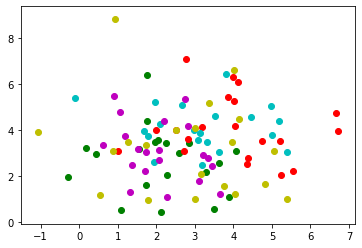

In [15]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # note that this code will fail to plot correctly if number of clusters are greater than 8
for i in range(len(X_train)):
    plt.scatter(X_train[i][0], X_train[i][1], color=colors[Y_train[i][0]])

Now draw scatter plot again, using separate colors for different clusters calculated using aglomerative clustering

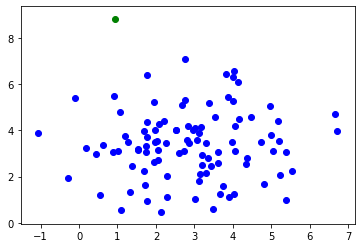

In [16]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'dimgrey', 'darkorange', 'forestgreen', 'lightgreen', 'blueviolet', 'fuchsia', 
         'orchid', 'teal', 'darkcyan', 'aqua', 'powderblue', 'cadetblue']
_, clusters = agglomerative_clustering_single(X_train, Y_train, X_test, Y_test, 2)
colors_used = 0
for i in range(len(clusters)):
    for points in clusters[i]:
        plt.scatter(points[0], points[1], color=colors[colors_used])
    if len(clusters[i]):
        colors_used += 1

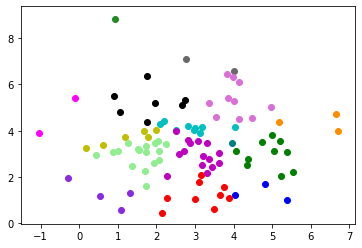

In [17]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'dimgrey', 'darkorange', 'forestgreen', 'lightgreen', 'blueviolet', 'fuchsia', 
         'orchid', 'teal', 'darkcyan', 'aqua', 'powderblue', 'cadetblue']
_, clusters = agglomerative_clustering_multi(X_train, Y_train, X_test, Y_test, 2)
colors_used = 0
for i in range(len(clusters)):
    for points in clusters[i]:
        plt.scatter(points[0], points[1], color=colors[colors_used])
    if len(clusters[i]):
        colors_used += 1